# Data Preprocessing Pipeline

This notebook contains the complete data preprocessing pipeline for academic articles from multiple sources (Scopus, Web of Science, and Google Scholar). The pipeline includes:

1. **Data Loading & Merging**: Combining datasets from different academic databases
2. **Data Quality Assessment**: Analyzing missing values and duplicates
3. **Duplicate Detection**: Using similarity-based matching to identify duplicates
4. **Data Integration**: Mapping and merging information from duplicate records
5. **Data Cleaning**: Final cleanup and preparation for analysis

## Objectives
- Merge articles from Scopus, WoS, and Google Scholar
- Detect and handle near-duplicate articles using fuzzy matching
- Integrate complementary information from duplicate records
- Produce a clean, consolidated dataset for further analysis

In [304]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from difflib import SequenceMatcher


## 1. Import Required Libraries

Import all necessary libraries for data processing, visualization, and similarity matching.

In [ ]:
# Load datasets from different academic databases
scopus = pd.read_csv('articles_scopus.csv')
wos = pd.read_csv('articles_wos.csv')
gs = pd.read_csv('articles_gs.csv')

## 2. Data Loading and Initial Exploration

Load datasets from different academic databases and explore their structure.

In [306]:
scopus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5801 entries, 0 to 5800
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            5801 non-null   object 
 1   Auteurs          5801 non-null   object 
 2   pub year         5771 non-null   object 
 3   author keywords  5337 non-null   object 
 4   citations        5801 non-null   int64  
 5   DOI              5151 non-null   object 
 6   abstract         5577 non-null   object 
 7   document type    5801 non-null   object 
 8   journal name     5340 non-null   object 
 9   issn             5466 non-null   object 
 10  H-index          5338 non-null   float64
 11  scope            1820 non-null   object 
 12  quartile         4945 non-null   object 
 13  sjr              4945 non-null   float64
 14  impact_factor    4945 non-null   float64
 15  publisher        5012 non-null   object 
dtypes: float64(3), int64(1), object(12)
memory usage: 725.2+ KB


In [307]:
gs

,title,Auteurs,pub year,author keywords,citations,DOI,abstract,document type,journal name,issn,H-index,scope,quartile,sjr,impact_factor,publisher
0,Mathematical analysis of a virus dynamics mode...,"Khalid Hattaf, Noura Yousfi, Abdessamad Tridane",2012.0,NaN,163,10.1016/j.nonrwa.2011.12.015,The rate of infection in many virus dynamics m...,Not specified on Google Scholar,Nonlinear Analysis: Real World Applications,14681218,102,NaN,Q4,2023: 1.163,NaN,Elsevier B.V.
1,Modeling the adaptive immune response in HBV i...,"Noura Yousfi, Khalid Hattaf, Abdessamad Tridane",2011.0,NaN,132,10.1007/s00285-010-0397-x,The aim of this work is to investigate a new m...,Not specified on Google Scholar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Stability analysis of a virus dynamics model w...,"Khalid Hattaf, Noura Yousfi, Abdessamad Tridane",2013.0,NaN,114,10.1016/j.amc.2013.07.005,The aim of this work is to study the dynamical...,Not specified on Google Scholar,Source title not found,ISSN not found,H-index not found,Scope not found,Quartile not found,SJR Score not found,NaN,Publisher not found
3,Age-structured Modeling of COVID-19 Epidemic i...,"Soufiane Bentout, Abdessamad Tridane, Salih Dj...",2020.0,NaN,103,10.1016/j.aej.2020.08.053,As the COVID-19 is still spreading in more tha...,Not specified on Google Scholar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Android and ODK based data collection framewor...,"Archana Raja, A Tridane, A Gaffar, T Lindquist...",2014.0,NaN,57,10.5210/ojphi.v5i3.4996,"Periodic collection of field data, analysis an...",Not specified on Google Scholar,Online Journal of Public Health Informatics,ISSN not found,H-index not found,Scope not found,Quartile not found,SJR Score not found,NaN,Publisher not found
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,Mapping Between RDBMS And Ontology: A,"Vishal Jain, SVAV Prasad",NaN,NaN,0,10.1109/iscc.2007.4381484,Today Semantic web is playing a key role in th...,Not specified on Google Scholar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4941,Détection des spams se basant sur les techniqu...,Charaf Eddine Gherabi,NaN,NaN,0,10.4000/communicationorganisation.669,Summary not available,Not specified on Google Scholar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Bahaj. M,"N Gherabi, K Addakiri",NaN,NaN,0,10.14324/000.wp.10060166,Summary not available,Not specified on Google Scholar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4943,CONSUMER BEHAVIOUR: HOW ELECTRIC CARS COULD CO...,"Laetitia Albert, Corino Fontana, Laura Gherabi",NaN,NaN,0,10.1016/j.enpol.2019.111181,Why is it electric cars still struggle to reac...,Not specified on Google Scholar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Merge all datasets into a single dataframe
articles_merged = pd.concat([scopus, wos, gs], ignore_index=True)
print(f"Total articles after merging: {len(articles_merged)}")

In [ ]:
# Save merged dataset for future use
articles_merged.to_csv('articles_merged.csv', index=False)
print("Merged dataset saved as 'articles_merged.csv'")

<strong style="color:red">Articles Processing</strong>

In [ ]:
# Load the merged articles dataset
Articles = pd.read_csv('articles_merged.csv')
print(f"Dataset shape: {Articles.shape}")
print(f"Columns: {list(Articles.columns)}")

## 3. Data Quality Assessment

Analyze the quality of the merged dataset by examining missing values, duplicates, and data distribution.

In [311]:
Articles

,title,Auteurs,pub year,author keywords,citations,DOI,abstract,document type,journal name,issn,H-index,scope,quartile,sjr,impact_factor,publisher
0,Characterizing land use-land cover changes in ...,"['Salhi, Wiam', 'Heddoun, Ouissal', 'Honnit, B...",2024,"['Deep learning', 'GIS', 'Land use-land cover'...",0,10.1007/s12518-024-00549-8,The examination of changes in land use and lan...,Article,Applied Geomatics,18669298,32.0,Applied Geomatics (AG) is the official journal...,Q2,0.536,2.430,Springer Science and Business Media Deutschlan...
1,A review & analysis of current IoT maturity & ...,"['Benotmane, Meryem', 'Elhari, Kaoutar', 'Kabb...",2023,"['Digital transformation', 'Industry 4.0', 'Io...",6,10.1016/j.sciaf.2023.e01748,Internet of Things (IoT) environments are char...,Article•,Scientific African,24682276,36.0,"ScientificAfrican is a peer reviewed, open acc...",Q1,0.575,3.347,Elsevier B.V.
2,Hybrid Deep Learning Architecture for Land Use...,"['Salhi, Wiam', 'Tabiti, Khouloud', 'Honnit, B...",2022,"['Deep learning', 'Image classification', 'Lan...",0,10.14569/IJACSA.2022.01312104,Deep Learning algorithms have become more popu...,Article•,International Journal of Advanced Computer Sci...,2158107X,47.0,Information not localizedJoin the conversation...,Q3,0.278,1.374,Science and Information Organization
3,Sentence Generation from Conceptual Graph Usin...,"['Bennani, Mohammed', 'Kabbaj, Adil']",2022,"['Conceptual graph', 'Natural language generat...",0,10.1007/978-3-030-94188-8_21,Deep learning (DL) is increasingly used in dif...,Book,Lecture Notes on Data Engineering and Communic...,23674512,30.0,The aim of the book series is to present cutti...,Q3,0.128,0.557,Springer Science and Business Media Deutschlan...
4,Survey of IoT Reference Architectures and Mode...,"['Benotmane, Meryem', 'Elhari, Kaoutar', 'Kabb...",2022,"['Digital manufacturing', 'Digital transformat...",0,10.1007/978-3-030-89906-6_21,"Nowadays, digital transformation is increasing...",Conference,Lecture Notes in Networks and Systems,23673370,36.0,The series contains proceedings and edited vol...,Q4,0.171,0.575,Springer Science and Business Media Deutschlan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12566,Mapping Between RDBMS And Ontology: A,"Vishal Jain, SVAV Prasad",NaN,NaN,0,10.1109/iscc.2007.4381484,Today Semantic web is playing a key role in th...,Not specified on Google Scholar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12567,Détection des spams se basant sur les techniqu...,Charaf Eddine Gherabi,NaN,NaN,0,10.4000/communicationorganisation.669,Summary not available,Not specified on Google Scholar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12568,Bahaj. M,"N Gherabi, K Addakiri",NaN,NaN,0,10.14324/000.wp.10060166,Summary not available,Not specified on Google Scholar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12569,CONSUMER BEHAVIOUR: HOW ELECTRIC CARS COULD CO...,"Laetitia Albert, Corino Fontana, Laura Gherabi",NaN,NaN,0,10.1016/j.enpol.2019.111181,Why is it electric cars still struggle to reac...,Not specified on Google Scholar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


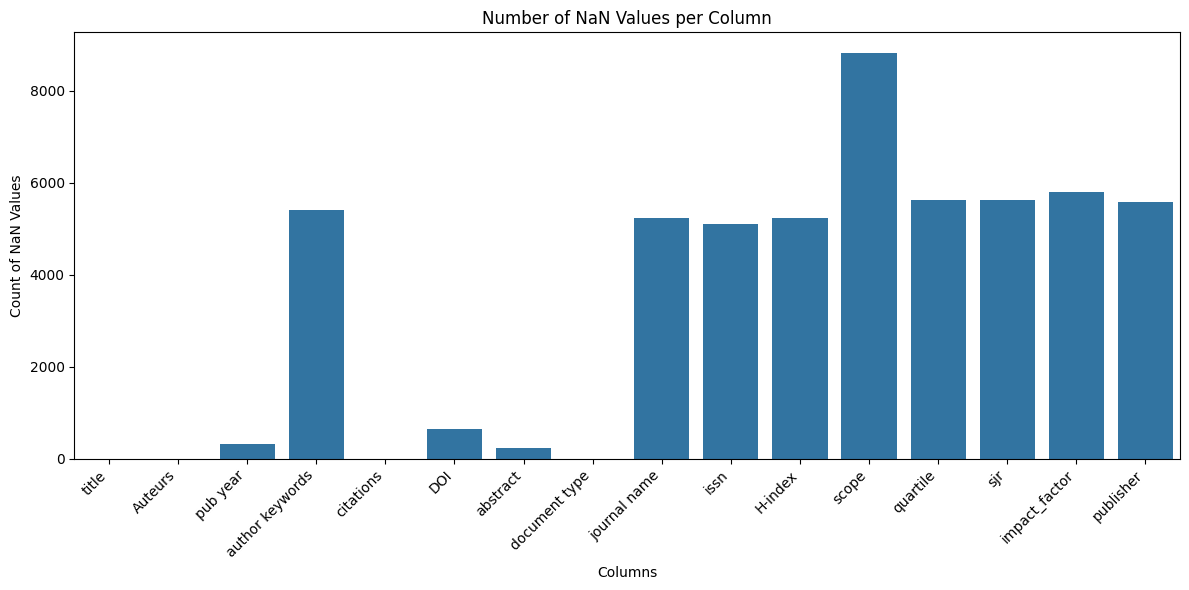

In [312]:
# Count NaN values in each column
nan_counts = Articles.isna().sum()

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=nan_counts.index, y=nan_counts.values)

# Customize plot
plt.xticks(rotation=45, ha='right')
plt.title('Number of NaN Values per Column')
plt.xlabel('Columns')
plt.ylabel('Count of NaN Values')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

### 3.1 Missing Values Analysis

Visualize the distribution of missing values across all columns to understand data completeness.

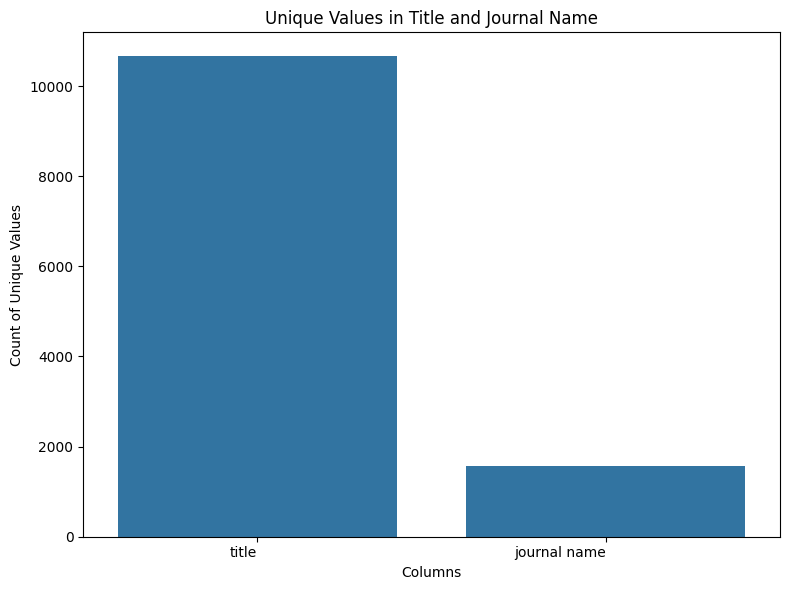

In [313]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select and count unique values
selected_columns = ['title', 'journal name']
unique_counts = Articles[selected_columns].nunique()

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=unique_counts.index, y=unique_counts.values)

# Customize plot
plt.title('Unique Values in Title and Journal Name')
plt.ylabel('Count of Unique Values')
plt.xlabel('Columns')
plt.xticks(rotation=0, ha='right')

plt.tight_layout()
plt.show()

### 3.2 Unique Values Analysis

Analyze the number of unique values in key columns to understand data diversity.

In [ ]:
# Check for exact duplicates across all columns
exact_duplicates = Articles.duplicated().sum()
print(f"Number of exact duplicates: {exact_duplicates}")

1325

## 4. Duplicate Detection and Handling

Detect and handle duplicates using exact matching and fuzzy string matching techniques.

In [ ]:
# Remove exact duplicates
Articles.drop_duplicates(inplace=True)
print(f"Shape after removing exact duplicates: {Articles.shape}")

In [316]:
Articles.shape

(11246, 16)

In [ ]:
# Check for duplicates based on title only
title_duplicates = Articles.duplicated(subset='title').sum()
print(f"Number of title-based duplicates: {title_duplicates}")

587

In [ ]:
# Remove duplicates based on title
Articles.drop_duplicates(subset='title', inplace=True)
print(f"Shape after removing title duplicates: {Articles.shape}")

In [ ]:
from rapidfuzz.fuzz import ratio

def similarity_score(string1, string2):
    """
    Calculate similarity score between two strings using rapidfuzz.
    
    Args:
        string1, string2: Strings to compare
    
    Returns:
        float: Similarity score between 0 and 1
    """
    return ratio(string1, string2) / 100.0  # Normalize to 0-1 scale

### 4.1 Fuzzy String Matching Functions

Define functions for detecting near-duplicate articles using similarity scoring.

In [ ]:
def find_duplicates(dataframe, column, threshold=0.8):
    """
    Find potential duplicates using fuzzy string matching.
    
    Args:
        dataframe: DataFrame to search
        column: Column name to compare
        threshold: Similarity threshold (0-1)
    
    Returns:
        list: List of tuples (index1, index2, similarity_score)
    """
    duplicates = []
    checked = set()
    
    for i, title1 in enumerate(dataframe[column]):
        for j, title2 in enumerate(dataframe[column]):
            if i != j and (j, i) not in checked:
                score = similarity_score(title1, title2)
                if score >= threshold:
                    duplicates.append((i, j, score))
                checked.add((i, j))
    
    return duplicates

In [ ]:
# Find duplicates using fuzzy matching with 80% similarity threshold
print("Searching for near-duplicate articles...")
duplicates = find_duplicates(Articles, 'title', threshold=0.8)
print(f"Found {len(duplicates)} potential duplicate pairs")

In [322]:
duplicates

[(9, 4839, 0.9375),
 (22, 4904, 0.993006993006993),
 (56, 75, 0.8873239436619719),
 (57, 62, 0.8461538461538461),
 (68, 4903, 0.9344262295081969),
 (99, 10314, 0.9339622641509435),
 (122, 10310, 0.8),
 (133, 4914, 0.8709677419354839),
 (135, 138, 0.9379310344827586),
 (143, 147, 0.8098159509202454),
 (145, 146, 0.8103448275862069),
 (148, 4923, 0.9859154929577465),
 (160, 4981, 0.9896907216494846),
 (174, 4982, 0.9021739130434783),
 (176, 4985, 0.9069767441860467),
 (281, 2298, 0.8),
 (285, 3498, 0.8),
 (290, 3498, 0.828125),
 (291, 10552, 0.9378531073446328),
 (293, 10551, 0.9135802469135803),
 (295, 302, 0.8529411764705883),
 (295, 305, 0.8131868131868132),
 (295, 3475, 0.9523809523809522),
 (296, 2196, 0.8114285714285714),
 (296, 10568, 0.8023255813953489),
 (296, 10569, 0.8045977011494253),
 (302, 305, 0.8617021276595744),
 (302, 306, 0.8061224489795918),
 (302, 3475, 0.8102564102564103),
 (305, 3497, 0.8520710059171599),
 (305, 3505, 0.8125),
 (306, 2673, 0.9035532994923858),
 (30

In [323]:
def validate_duplicates(dataframe, duplicates):
    valid_duplicates = []

    for idx1, idx2, score in duplicates:
        # Check if both indices exist in the DataFrame
        if idx1 in dataframe.index and idx2 in dataframe.index:
            valid_duplicates.append((idx1, idx2, score))
    
    return valid_duplicates
duplicates=validate_duplicates(Articles,duplicates)

In [324]:
def find_duplicates_blocking(dataframe, column, threshold=0.8, block_size=20):
    from collections import defaultdict

    # Create a dictionary to group by blocking key
    blocking_groups = defaultdict(list)
    for idx, title in enumerate(dataframe[column]):
        block_key = title[:block_size].lower()  # Generate the blocking key
        blocking_groups[block_key].append((idx, title))

    duplicates = []

    # Compare records only within the same blocking group
    for block_key, records in blocking_groups.items():
        checked = set()
        for i, (idx1, title1) in enumerate(records):
            for j, (idx2, title2) in enumerate(records):
                if i != j and (idx2, idx1) not in checked:
                    score = similarity_score(title1, title2)
                    if score >= threshold:
                        duplicates.append((idx1, idx2, score))
                    checked.add((idx1, idx2))
    return duplicates


In [325]:
Articles.isna().sum()

title                 0
Auteurs               0
pub year            314
author keywords    4960
citations             0
DOI                 512
abstract            111
document type         0
journal name       4906
issn               4795
H-index            4908
scope              7811
quartile           5224
sjr                5224
impact_factor      5339
publisher          5198
dtype: int64

In [326]:
def map_citations(dataframe, citation_column, duplicates):
    for idx1, idx2, score in duplicates:
        original_idx = min(idx1, idx2)
        duplicate_idx = max(idx1, idx2)
        # Check if citation is missing or empty
        current_citations = dataframe.at[duplicate_idx, citation_column]
        if pd.isna(current_citations) or current_citations == '':
            # If no citation, set the original index as the citation
            dataframe.at[duplicate_idx, citation_column] = original_idx
        else:
            # If citation already exists, append the original index as an additional citation
            if isinstance(current_citations, int):
                # If the current citation is a single integer, convert it to a string
                dataframe.at[duplicate_idx, citation_column] = f"{current_citations}, {original_idx}"
            else:
                # Append original index to the existing citation list
                dataframe.at[duplicate_idx, citation_column] += f", {original_idx}"
    return dataframe


## 5. Data Integration Functions

Define functions to merge information from duplicate records, preserving the most complete data.

In [327]:
def map_issn(dataframe, issn_column, duplicates):
    for idx1, idx2, score in duplicates:
        # Determine the original and duplicate rows
        original_idx = min(idx1, idx2)
        duplicate_idx = max(idx1, idx2)
        # Check if the original ISSN is NaN
        if pd.isna(dataframe.at[original_idx, issn_column]) or dataframe.at[original_idx, issn_column] == '':
            # If so, take the ISSN from the duplicate row
            duplicate_issn = dataframe.at[duplicate_idx, issn_column]
            if not pd.isna(duplicate_issn) and duplicate_issn != '':
                dataframe.at[original_idx, issn_column] = duplicate_issn
    return dataframe


In [328]:
def map_abstract(dataframe, abstract_column, duplicates):
    for idx1, idx2, score in duplicates:
        # Determine the original and duplicate rows
        original_idx = min(idx1, idx2)
        duplicate_idx = max(idx1, idx2)
        # Check if the original abstract is NaN
        if pd.isna(dataframe.at[original_idx, abstract_column]) or dataframe.at[original_idx, abstract_column] == '':
            # If so, take the abstract from the duplicate row
            duplicate_abstract = dataframe.at[duplicate_idx, abstract_column]
            if not pd.isna(duplicate_abstract) and duplicate_abstract != '':
                dataframe.at[original_idx, abstract_column] = duplicate_abstract
    return dataframe


In [329]:
def map_keywords(dataframe ,keywords_column, duplicates):
    for idx1, idx2, score in duplicates:
        # Determine the original and duplicate rows
        original_idx = min(idx1, idx2)
        duplicate_idx = max(idx1, idx2)
        # Map keywords
        original_keywords = dataframe.at[original_idx, keywords_column]
        duplicate_keywords = dataframe.at[duplicate_idx, keywords_column]
        if (pd.isna(original_keywords) or original_keywords == []) and not pd.isna(duplicate_keywords):
            dataframe.at[original_idx, keywords_column] = duplicate_keywords
    return dataframe


In [330]:
def map_journalname(dataframe, journal_column, duplicates):
    for idx1, idx2, score in duplicates:
        # Determine the original and duplicate rows
        original_idx = min(idx1, idx2)
        duplicate_idx = max(idx1, idx2)
        # Check if the original abstract is NaN
        if pd.isna(dataframe.at[original_idx, journal_column]) or dataframe.at[original_idx, journal_column] == '':
            # If so, take the abstract from the duplicate row
            duplicate_abstract = dataframe.at[duplicate_idx, journal_column]
            if not pd.isna(duplicate_abstract) and duplicate_abstract != '':
                dataframe.at[original_idx, journal_column] = duplicate_abstract
    return dataframe


In [331]:
def map_pub_year(dataframe, pub_year_column, duplicates):
    for idx1, idx2, score in duplicates:
        # Determine the original and duplicate rows
        original_idx = min(idx1, idx2)
        duplicate_idx = max(idx1, idx2)
        
        # Map publication year
        original_pub_year = dataframe.at[original_idx, pub_year_column]
        duplicate_pub_year = dataframe.at[duplicate_idx, pub_year_column]
        
        if (pd.isna(original_pub_year) or original_pub_year == []) and not pd.isna(duplicate_pub_year):
            dataframe.at[original_idx, pub_year_column] = duplicate_pub_year
    
    return dataframe


In [332]:
def map_DOI(dataframe, DOI_column, duplicates):
    for idx1, idx2, score in duplicates:
        # Determine the original and duplicate rows
        original_idx = min(idx1, idx2)
        duplicate_idx = max(idx1, idx2)
        # Check if the original ISSN is NaN
        if pd.isna(dataframe.at[original_idx, DOI_column]) or dataframe.at[original_idx, DOI_column] == '':
            # If so, take the ISSN from the duplicate row
            duplicate_issn = dataframe.at[duplicate_idx, DOI_column]
            if not pd.isna(duplicate_issn) and duplicate_issn != '':
                dataframe.at[original_idx, DOI_column] = duplicate_issn
    return dataframe


In [333]:
def map_H_index(dataframe, H_index_column, duplicates):
    for idx1, idx2, score in duplicates:
        # Determine the original and duplicate rows
        original_idx = min(idx1, idx2)
        duplicate_idx = max(idx1, idx2)
        # Check if the original abstract is NaN
        if pd.isna(dataframe.at[original_idx, H_index_column]) or dataframe.at[original_idx, H_index_column] == '':
            # If so, take the abstract from the duplicate row
            duplicate_abstract = dataframe.at[duplicate_idx, H_index_column]
            if not pd.isna(duplicate_abstract) and duplicate_abstract != '':
                dataframe.at[original_idx,H_index_column] = duplicate_abstract
    return dataframe


In [334]:
def map_Q(dataframe, Q_column, duplicates):
    for idx1, idx2, score in duplicates:
        # Determine the original and duplicate rows
        original_idx = min(idx1, idx2)
        duplicate_idx = max(idx1, idx2)
        # Check if the original abstract is NaN
        if pd.isna(dataframe.at[original_idx,Q_column]) or dataframe.at[original_idx,Q_column] == '':
            # If so, take the abstract from the duplicate row
            duplicate_abstract = dataframe.at[duplicate_idx, Q_column]
            if not pd.isna(duplicate_abstract) and duplicate_abstract != '':
                dataframe.at[original_idx,Q_column] = duplicate_abstract
    return dataframe


In [335]:
def map_sjr(dataframe, sjr_column, duplicates):
    for idx1, idx2, score in duplicates:
        # Determine the original and duplicate rows
        original_idx = min(idx1, idx2)
        duplicate_idx = max(idx1, idx2)
        # Check if the original abstract is NaN
        if pd.isna(dataframe.at[original_idx,sjr_column]) or dataframe.at[original_idx, sjr_column] == '':
            # If so, take the abstract from the duplicate row
            duplicate_abstract = dataframe.at[duplicate_idx,sjr_column]
            if not pd.isna(duplicate_abstract) and duplicate_abstract != '':
                dataframe.at[original_idx,sjr_column] = duplicate_abstract
    return dataframe


In [336]:
def map_impact_factor(dataframe, IFcolumn, duplicates):
    for idx1, idx2, score in duplicates:
        # Determine the original and duplicate rows
        original_idx = min(idx1, idx2)
        duplicate_idx = max(idx1, idx2)
        # Check if the original abstract is NaN
        if pd.isna(dataframe.at[original_idx, IFcolumn]) or dataframe.at[original_idx, IFcolumn] == '':
            # If so, take the abstract from the duplicate row
            duplicate_abstract = dataframe.at[duplicate_idx,IFcolumn]
            if not pd.isna(duplicate_abstract) and duplicate_abstract != '':
                dataframe.at[original_idx,IFcolumn] = duplicate_abstract
    return dataframe


In [337]:
def map_scope(dataframe, scope_column, duplicates):
    for idx1, idx2, score in duplicates:
        # Determine the original and duplicate rows
        original_idx = min(idx1, idx2)
        duplicate_idx = max(idx1, idx2)
        # Check if the original abstract is NaN
        if pd.isna(dataframe.at[original_idx,scope_column]) or dataframe.at[original_idx, scope_column] == '':
            # If so, take the abstract from the duplicate row
            duplicate_abstract = dataframe.at[duplicate_idx, scope_column]
            if not pd.isna(duplicate_abstract) and duplicate_abstract != '':
                dataframe.at[original_idx,scope_column] = duplicate_abstract
    return dataframe


In [338]:
def map_publisher(dataframe,pub_column, duplicates):
    for idx1, idx2, score in duplicates:
        # Determine the original and duplicate rows
        original_idx = min(idx1, idx2)
        duplicate_idx = max(idx1, idx2)
        # Check if the original abstract is NaN
        if pd.isna(dataframe.at[original_idx,pub_column]) or dataframe.at[original_idx, pub_column] == '':
            # If so, take the abstract from the duplicate row
            duplicate_abstract = dataframe.at[duplicate_idx, pub_column]
            if not pd.isna(duplicate_abstract) and duplicate_abstract != '':
                dataframe.at[original_idx,pub_column] = duplicate_abstract
    return dataframe


In [339]:
Articles.isna().sum()

title                 0
Auteurs               0
pub year            314
author keywords    4960
citations             0
DOI                 512
abstract            111
document type         0
journal name       4906
issn               4795
H-index            4908
scope              7811
quartile           5224
sjr                5224
impact_factor      5339
publisher          5198
dtype: int64

In [340]:
Articles=map_citations(Articles, 'citations', duplicates)
Articles=map_issn(Articles, 'issn', duplicates)
Articles=map_abstract(Articles, 'abstract', duplicates)
Articles=map_keywords(Articles, 'author keywords', duplicates)
Articles=map_journalname(Articles, 'journal name', duplicates)
Articles=map_pub_year(Articles, 'pub year', duplicates)
Articles=map_DOI(Articles, 'DOI', duplicates)
Articles=map_H_index(Articles, 'H-index', duplicates)
Articles=map_sjr(Articles,"sjr",duplicates)
Articles=map_Q(Articles,'quartile',duplicates)
Articles=map_impact_factor(Articles,"impact_factor",duplicates)
Articles=map_publisher(Articles,'publisher',duplicates)
Articles=map_scope(Articles,"scope",duplicates)

In [341]:
Articles.isna().sum()

title                 0
Auteurs               0
pub year            305
author keywords    4951
citations             0
DOI                 499
abstract            106
document type         0
journal name       4897
issn               4787
H-index            4899
scope              7782
quartile           5209
sjr                5209
impact_factor      5324
publisher          5182
dtype: int64

In [343]:
duplicates_to_drop = set() 

for idx1, idx2, score in duplicates:
    original_idx = min(idx1, idx2)
    duplicate_idx = max(idx1, idx2)
    duplicates_to_drop.add(duplicate_idx)
Articles = Articles.drop(index=list(duplicates_to_drop)).reset_index(drop=True)

In [345]:
Articles.dropna(subset=['journal name','abstract','author keywords'],inplace=True)

In [346]:
Articles

,title,Auteurs,pub year,author keywords,citations,DOI,abstract,document type,journal name,issn,H-index,scope,quartile,sjr,impact_factor,publisher
0,Characterizing land use-land cover changes in ...,"['Salhi, Wiam', 'Heddoun, Ouissal', 'Honnit, B...",2024,"['Deep learning', 'GIS', 'Land use-land cover'...",0,10.1007/s12518-024-00549-8,The examination of changes in land use and lan...,Article,Applied Geomatics,18669298,32.0,Applied Geomatics (AG) is the official journal...,Q2,0.536,2.430,Springer Science and Business Media Deutschlan...
1,A review & analysis of current IoT maturity & ...,"['Benotmane, Meryem', 'Elhari, Kaoutar', 'Kabb...",2023,"['Digital transformation', 'Industry 4.0', 'Io...",6,10.1016/j.sciaf.2023.e01748,Internet of Things (IoT) environments are char...,Article•,Scientific African,24682276,36.0,"ScientificAfrican is a peer reviewed, open acc...",Q1,0.575,3.347,Elsevier B.V.
2,Hybrid Deep Learning Architecture for Land Use...,"['Salhi, Wiam', 'Tabiti, Khouloud', 'Honnit, B...",2022,"['Deep learning', 'Image classification', 'Lan...",0,10.14569/IJACSA.2022.01312104,Deep Learning algorithms have become more popu...,Article•,International Journal of Advanced Computer Sci...,2158107X,47.0,Information not localizedJoin the conversation...,Q3,0.278,1.374,Science and Information Organization
3,Sentence Generation from Conceptual Graph Usin...,"['Bennani, Mohammed', 'Kabbaj, Adil']",2022,"['Conceptual graph', 'Natural language generat...",0,10.1007/978-3-030-94188-8_21,Deep learning (DL) is increasingly used in dif...,Book,Lecture Notes on Data Engineering and Communic...,23674512,30.0,The aim of the book series is to present cutti...,Q3,0.128,0.557,Springer Science and Business Media Deutschlan...
4,Survey of IoT Reference Architectures and Mode...,"['Benotmane, Meryem', 'Elhari, Kaoutar', 'Kabb...",2022,"['Digital manufacturing', 'Digital transformat...",0,10.1007/978-3-030-89906-6_21,"Nowadays, digital transformation is increasing...",Conference,Lecture Notes in Networks and Systems,23673370,36.0,The series contains proceedings and edited vol...,Q4,0.171,0.575,Springer Science and Business Media Deutschlan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,Analysis of the visual Lombard effect and auto...,"['Heracleous, Panikos', 'Ishi, Carlos T.', 'Sa...",2013,"['Lip-reading', 'Automatic speech recognition'...",13,10.1016/j.csl.2012.06.003,<p>This study focuses on automatic visual spee...,['Article'],Computer Speech and Language,0885-2308,83,Computer Speech & Language publishes reports o...,Q1,1.05,6.103,Academic Press
5820,<i>Step-by-step</i> and <i>integrated</i> appr...,"['Meignier, S', 'Moraru, D', 'Fredouille, C', ...",2006,[],82,10.1016/j.csl.2005.08.002,<p>This paper summarizes the collaboration of ...,"['Article', 'Proceedings Paper']",Computer Speech and Language,0885-2308,83,Computer Speech & Language publishes reports o...,Q1,1.05,6.103,Academic Press
5821,Analysis and Recognition of NAM Speech Using H...,"['Heracleous, Panikos', 'Tran, Viet-Anh', 'Nag...",2010,"['Audio-visual NAM speech recognition', 'hidde...",12,10.1109/TASL.2009.2037398,<p>Non-audible murmur (NAM) is an unvoiced spe...,['Article'],"IEEE Transactions on Audio, Speech and Languag...",1558-7916,134,"Cessation. IEEE Transactions on Audio, Speech ...",Q1,0.926,0.000,Institute of Electrical and Electronics Engine...
5822,Automatic Speech Recognition for Under-Resourc...,"['Le, Viet-Bac', 'Besacier, Laurent']",2009,"['Crosslingual acoustic modeling', 'grapheme-b...",64,10.1109/TASL.2009.2021723,<p>This paper presents our work in automatic s...,['Article'],"IEEE Transactions on Audio, Speech and Languag...",1558-7916,134,"Cessation. IEEE Transactions on Audio, Speech ...",Q1,0.926,0.000,Institute of Electrical and Electronics Engine...


In [350]:
Articles['pub year'].fillna("0000-00-00",inplace=True)
Articles['DOI'].fillna("No DOI",inplace=True)
Articles['H-index'].fillna("No H-index",inplace=True)
Articles['sjr'].fillna("No SJR",inplace=True)
Articles['quartile'].fillna("No Quartile",inplace=True)
Articles['impact_factor'].fillna("No Impact Factor",inplace=True)
Articles['publisher'].fillna("No Publisher",inplace=True)
Articles['scope'].fillna("No Scope",inplace=True)


C:\Users\dell\AppData\Local\Temp\ipykernel_6272\175790797.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Articles['pub year'].fillna("0000-00-00",inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_6272\175790797.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [352]:
Articles

,title,Auteurs,pub year,author keywords,citations,DOI,abstract,document type,journal name,issn,H-index,scope,quartile,sjr,impact_factor,publisher
0,Characterizing land use-land cover changes in ...,"['Salhi, Wiam', 'Heddoun, Ouissal', 'Honnit, B...",2024,"['Deep learning', 'GIS', 'Land use-land cover'...",0,10.1007/s12518-024-00549-8,The examination of changes in land use and lan...,Article,Applied Geomatics,18669298,32.0,Applied Geomatics (AG) is the official journal...,Q2,0.536,2.43,Springer Science and Business Media Deutschlan...
1,A review & analysis of current IoT maturity & ...,"['Benotmane, Meryem', 'Elhari, Kaoutar', 'Kabb...",2023,"['Digital transformation', 'Industry 4.0', 'Io...",6,10.1016/j.sciaf.2023.e01748,Internet of Things (IoT) environments are char...,Article•,Scientific African,24682276,36.0,"ScientificAfrican is a peer reviewed, open acc...",Q1,0.575,3.347,Elsevier B.V.
2,Hybrid Deep Learning Architecture for Land Use...,"['Salhi, Wiam', 'Tabiti, Khouloud', 'Honnit, B...",2022,"['Deep learning', 'Image classification', 'Lan...",0,10.14569/IJACSA.2022.01312104,Deep Learning algorithms have become more popu...,Article•,International Journal of Advanced Computer Sci...,2158107X,47.0,Information not localizedJoin the conversation...,Q3,0.278,1.374,Science and Information Organization
3,Sentence Generation from Conceptual Graph Usin...,"['Bennani, Mohammed', 'Kabbaj, Adil']",2022,"['Conceptual graph', 'Natural language generat...",0,10.1007/978-3-030-94188-8_21,Deep learning (DL) is increasingly used in dif...,Book,Lecture Notes on Data Engineering and Communic...,23674512,30.0,The aim of the book series is to present cutti...,Q3,0.128,0.557,Springer Science and Business Media Deutschlan...
4,Survey of IoT Reference Architectures and Mode...,"['Benotmane, Meryem', 'Elhari, Kaoutar', 'Kabb...",2022,"['Digital manufacturing', 'Digital transformat...",0,10.1007/978-3-030-89906-6_21,"Nowadays, digital transformation is increasing...",Conference,Lecture Notes in Networks and Systems,23673370,36.0,The series contains proceedings and edited vol...,Q4,0.171,0.575,Springer Science and Business Media Deutschlan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,Analysis of the visual Lombard effect and auto...,"['Heracleous, Panikos', 'Ishi, Carlos T.', 'Sa...",2013,"['Lip-reading', 'Automatic speech recognition'...",13,10.1016/j.csl.2012.06.003,<p>This study focuses on automatic visual spee...,['Article'],Computer Speech and Language,0885-2308,83,Computer Speech & Language publishes reports o...,Q1,1.05,6.103,Academic Press
5820,<i>Step-by-step</i> and <i>integrated</i> appr...,"['Meignier, S', 'Moraru, D', 'Fredouille, C', ...",2006,[],82,10.1016/j.csl.2005.08.002,<p>This paper summarizes the collaboration of ...,"['Article', 'Proceedings Paper']",Computer Speech and Language,0885-2308,83,Computer Speech & Language publishes reports o...,Q1,1.05,6.103,Academic Press
5821,Analysis and Recognition of NAM Speech Using H...,"['Heracleous, Panikos', 'Tran, Viet-Anh', 'Nag...",2010,"['Audio-visual NAM speech recognition', 'hidde...",12,10.1109/TASL.2009.2037398,<p>Non-audible murmur (NAM) is an unvoiced spe...,['Article'],"IEEE Transactions on Audio, Speech and Languag...",1558-7916,134,"Cessation. IEEE Transactions on Audio, Speech ...",Q1,0.926,0.0,Institute of Electrical and Electronics Engine...
5822,Automatic Speech Recognition for Under-Resourc...,"['Le, Viet-Bac', 'Besacier, Laurent']",2009,"['Crosslingual acoustic modeling', 'grapheme-b...",64,10.1109/TASL.2009.2021723,<p>This paper presents our work in automatic s...,['Article'],"IEEE Transactions on Audio, Speech and Languag...",1558-7916,134,"Cessation. IEEE Transactions on Audio, Speech ...",Q1,0.926,0.0,Institute of Electrical and Electronics Engine...


In [353]:
Articles.to_csv('articles_cleaned.csv',index=False)

,title,Auteurs,pub year,author keywords,citations,DOI,abstract,document type,journal name,issn,H-index,scope,quartile,sjr,impact_factor,publisher
0,Characterizing land use-land cover changes in ...,"['Salhi, Wiam', 'Heddoun, Ouissal', 'Honnit, B...",2024,"['Deep learning', 'GIS', 'Land use-land cover'...",0,10.1007/s12518-024-00549-8,The examination of changes in land use and lan...,Article,Applied Geomatics,18669298,32.0,Applied Geomatics (AG) is the official journal...,Q2,0.536,2.43,Springer Science and Business Media Deutschlan...
1,A review & analysis of current IoT maturity & ...,"['Benotmane, Meryem', 'Elhari, Kaoutar', 'Kabb...",2023,"['Digital transformation', 'Industry 4.0', 'Io...",6,10.1016/j.sciaf.2023.e01748,Internet of Things (IoT) environments are char...,Article•,Scientific African,24682276,36.0,"ScientificAfrican is a peer reviewed, open acc...",Q1,0.575,3.347,Elsevier B.V.
2,Hybrid Deep Learning Architecture for Land Use...,"['Salhi, Wiam', 'Tabiti, Khouloud', 'Honnit, B...",2022,"['Deep learning', 'Image classification', 'Lan...",0,10.14569/IJACSA.2022.01312104,Deep Learning algorithms have become more popu...,Article•,International Journal of Advanced Computer Sci...,2158107X,47.0,Information not localizedJoin the conversation...,Q3,0.278,1.374,Science and Information Organization
3,Sentence Generation from Conceptual Graph Usin...,"['Bennani, Mohammed', 'Kabbaj, Adil']",2022,"['Conceptual graph', 'Natural language generat...",0,10.1007/978-3-030-94188-8_21,Deep learning (DL) is increasingly used in dif...,Book,Lecture Notes on Data Engineering and Communic...,23674512,30.0,The aim of the book series is to present cutti...,Q3,0.128,0.557,Springer Science and Business Media Deutschlan...
4,Survey of IoT Reference Architectures and Mode...,"['Benotmane, Meryem', 'Elhari, Kaoutar', 'Kabb...",2022,"['Digital manufacturing', 'Digital transformat...",0,10.1007/978-3-030-89906-6_21,"Nowadays, digital transformation is increasing...",Conference,Lecture Notes in Networks and Systems,23673370,36.0,The series contains proceedings and edited vol...,Q4,0.171,0.575,Springer Science and Business Media Deutschlan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,Analysis of the visual Lombard effect and auto...,"['Heracleous, Panikos', 'Ishi, Carlos T.', 'Sa...",2013,"['Lip-reading', 'Automatic speech recognition'...",13,10.1016/j.csl.2012.06.003,<p>This study focuses on automatic visual spee...,['Article'],Computer Speech and Language,0885-2308,83,Computer Speech & Language publishes reports o...,Q1,1.05,6.103,Academic Press
5820,<i>Step-by-step</i> and <i>integrated</i> appr...,"['Meignier, S', 'Moraru, D', 'Fredouille, C', ...",2006,[],82,10.1016/j.csl.2005.08.002,<p>This paper summarizes the collaboration of ...,"['Article', 'Proceedings Paper']",Computer Speech and Language,0885-2308,83,Computer Speech & Language publishes reports o...,Q1,1.05,6.103,Academic Press
5821,Analysis and Recognition of NAM Speech Using H...,"['Heracleous, Panikos', 'Tran, Viet-Anh', 'Nag...",2010,"['Audio-visual NAM speech recognition', 'hidde...",12,10.1109/TASL.2009.2037398,<p>Non-audible murmur (NAM) is an unvoiced spe...,['Article'],"IEEE Transactions on Audio, Speech and Languag...",1558-7916,134,"Cessation. IEEE Transactions on Audio, Speech ...",Q1,0.926,0.0,Institute of Electrical and Electronics Engine...
5822,Automatic Speech Recognition for Under-Resourc...,"['Le, Viet-Bac', 'Besacier, Laurent']",2009,"['Crosslingual acoustic modeling', 'grapheme-b...",64,10.1109/TASL.2009.2021723,<p>This paper presents our work in automatic s...,['Article'],"IEEE Transactions on Audio, Speech and Languag...",1558-7916,134,"Cessation. IEEE Transactions on Audio, Speech ...",Q1,0.926,0.0,Institute of Electrical and Electronics Engine...
